# FODO cell, basic principles

The goal of this first step is to get a first glance at the Courant Snyder parameters $\beta$, $\gamma$, $\alpha$, in a typical FODO lattice. All the equations used are taken from the book *Beam Dynamics in High Energy particle accelerators*.

These parameters are dependant on the length $L_q$ of the quadrupole and the gradient of magnetic field $\frac{\partial B_{y}}{\partial x}$. We will make the assumption of quadrupoles being thin lenses (thus thin $L$), we get the following equations

We first have to comute the value $k_1$, which is a function of $s$ that characterises the focusing at each point along the beam line. In a drift space, for example, $k_1 = 0$ since the momentum of a particle will be constant. In a quadrupole, in the approximation $p_x \approx x_0$, we get the following results (eq 4.1-4.2-4.3 of the book) :


$$\begin{array}{c}
L_q \rightarrow 0 \\
k_{1} L_q \rightarrow \frac{1}{f} \\
k_{1}=\frac{q}{P_{0}} \frac{\partial B_{y}}{\partial x}
\end{array}$$

$B_y(s)$ is the vertical component of the magnetic field, $q$ is the charge of the particle we consider, $f$ is the focal length $P_0 = \beta_0\gamma_0 mc$ is the initial canonical momentum. 

In the same book, these parameters are set respectively to $L_q = 1$, $f = \sqrt{2}$, $k_1 = 0$ in a drift space of the FODO lattice.

In [26]:
%matplotlib notebook 

import numpy as np
import math as m
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter, LogLocator

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 18})


plt.rcParams["figure.figsize"] = (9,6) # to ge bigger figures

In [28]:
L_q = 1; # length in meters TO BE SET
f = np.sqrt(2); # focal length in this qudrupole
k_1 = 1/(f*L_q); # k_1 in a quadrupole
k_1_drift = 0 # k_1 in a drift region



The transfer matrix caracterising the behaviour a quadrupole along the beam line is the following (eq 4.4)
$$R_{\mathrm{F}}=\left(\begin{array}{rrrrr}
1 & 0 & 0 & 0 & 0 \\
-\frac{1}{f} & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & \frac{1}{f} & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1
\end{array}\right)$$

The transfer matrix for a drift portion is the following, where $L$ is the drift length. (eq 4.5)

$$R_{\mathrm{drift}}=\left(\begin{array}{cccccc}
1 & L & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & L & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & \frac{L}{\beta_{0}^{2} \gamma_{0}^{2}} \\
0 & 0 & 0 & 0 & 0 & 1
\end{array}\right)$$

For an entire FODO cell, with a starting point $s=s_0$ (entrance of the focusing quadrupole), we get the matrix (eq 4.9)

$$R = R_{drift}R_D R_{drift} R_F = R=\left(\begin{array}{ccc}
R_{x} & 0 & 0 \\
0 & R_{y} & 0 \\
0 & 0 & R_{z}
\end{array}\right)$$

Where (eq 4.10-11-12)
$$ R_{x}=\left(\begin{array}{cc}
1-\frac{L}{f}\left(1+\frac{L}{f}\right) & \frac{L}{f}(2 f+L) \\
-\frac{L}{f^{2}} & 1+\frac{L}{f}
\end{array}\right) \qquad R_{y}=\left(\begin{array}{cc}
1+\frac{L}{f}\left(1-\frac{L}{f}\right) & \frac{L}{f}(2 f-L) \\
-\frac{L}{f^{2}} & 1-\frac{L}{f} \end{array}\right)  \qquad R_{z}=\left(\begin{array}{ll}
1 & \frac{2 L}{\beta_{0}^{2} \gamma_{0}^{2}} \\
0 & 1 \end{array}\right)
$$

Notice that the $R_y$, which represents the defocusing plane, is the same matrix that $R_x$ the focusing plane with $f$ set to $-f$, which makes sense from an optical point of view.

In this first approach, we will consider $L_q = L$, as if the focusing and defocusing quadrupoles were attached together.

In [29]:
L = L_q ; # quadrupoles attached 

# Building the transfer matrix of the FODO cell
Rx1 = 1 - L/f*(1+L/f); Rx2 = L/f*(2*f+L); Rx3 = -L/(f**2); Rx4 = 1+L/f;
Ry1 = 1 + L/f*(1-L/f); Ry2 = L/f*(2*f-L); Ry3 = -L/f**2; Ry4 = 1-L/f;
Rx = np.matrix([[Rx1, Rx2], [Rx3, Rx4]]);
Ry = np.matrix([[Ry1, Ry2], [Ry3, Ry4]]);


Now we have enough information to start computing the Courant Snyder parameters. We know that in our case, a particle propagating along the beamline $s$ with the x direction as its transversal axis, $ Tr(R_x) = 2 cos(\mu_x) $ where $\mu_x$ is the betatron phase advance. The trace is an invariant under changing the starting point, so does the phase advance.


We have the formula  (eq. 4.20)
$$R_{x}=\left(\begin{array}{cc}
\cos \mu_{x}+\alpha_{x} \sin \mu_{x} & \beta_{x} \sin \mu_{x} \\
-\gamma_{x} \sin \mu_{x} & \cos \mu_{x}-\alpha_{x} \sin \mu_{x}
\end{array}\right)$$

Which allows us to find the values of the Courant Snyder parameters, using only the values found for $R_x$ and the value calculated for $\mu_x$.

In [30]:
# the coefficients at the focusing quadrupole
tr= Rx1 + Rx4;
print(tr)

mu_x = m.acos(tr/2) ; # plus or minus 1 at the beginning
alpha_x0 = (Rx1 - Rx4)/(2*np.sin(mu_x));
beta_x0 = Rx2/np.sin(mu_x);
gamma_x0 = -Rx3/np.sin(mu_x);

test = beta_x0*gamma_x0 - alpha_x0**2
print(test) # almost 1 , OK

# the coefficients at the defocusing quadrupole
tr= np.asscalar(Ry.trace());
print(tr)
mu_y = m.acos(tr/2) ;
alpha_y0 = (Ry1 - tr/2)/np.sin(mu_y);
beta_y0 = Ry2/np.sin(mu_y);
gamma_y0 = -Ry3/np.sin(mu_y); 


test = beta_y0*gamma_y0 - alpha_y0**2
print(test) # almost 1 , OK
# gamma remains a constant


1.5
0.9999999999999991
1.5
0.9999999999999998


<ipython-input-30-ee0d2606e896>:14: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  tr= np.asscalar(Ry.trace());


The equation (4.82) is the differential equation giving the behaviour of the $\beta$ function :
$$\beta_{x}^{\prime \prime}-\frac{4+\beta_{x}^{\prime 2}}{2 \beta_{x}}+2 k_{1} \beta_{x}=0$$

We use this equation for drift spaces in between quadrupoles, where $k_1 = 0$. Solving this equation gives us solution of type:
$$\beta(s) = \frac{(c_1^2 + 4) s^2}{4 c_2} + c_1 s + c_2$$

Using the boundary conditions and the fact that the beta function is minimal at $L$ , we can complete this equation. For the drift after the focusing quadrupole : 
$$c_2 = \beta_{x0} \quad c_1 = \frac{- L^2 \pm \sqrt{\Delta}}{2\frac{L^2}{4\beta_{x_0}}}  \quad \text{ where } \quad \Delta = L^2 - \frac{L^2}{4\beta_{x_0}}\left(\beta_{x_0} +\frac{L^2}{\beta_{x_0}} - \beta_{y_0}\right)$$

The $\beta_{x0}$ $\beta_{y 0}$ have to be interchange in order to get the equation of $\beta$ in the drift space following the defocusing quadrupole.

For the second Courant Snyder parameter (eq. 4.54)
$$\alpha = - \frac{1}{2} \frac{d \beta}{ds} =  - \frac{1}{2} \left(\frac{(c_1^2 + 4) s}{2 c_2} + c_1 \right)$$ 

Moreover we have the equation (4.74) which gives us the last parameter $\gamma$ 
$$\beta_x \gamma_x - \alpha_x^2 = 1$$ 

This parameter is an invariant of the particle's motion (a constant).

In [31]:
size = 10**4

# we are going to devide the drift spaces
s = np.linspace(0,L,size);

    # drift after focusing
a = L**2/(4*beta_x0);
b = L;
c = beta_x0 + L**2/beta_x0 - beta_y0 ;
delta = b**2 - 4*a*c;
c_1 = (-b + np.sqrt(delta))/(2*a) # this solution of the polynomial is the physical one
c_2 = beta_x0;


beta_FD =  [(c_1**2 + 4)*x**2/(4*c_2) + c_1*x + c_2 for x in s] ; #beta in the drift following the focusing quadrupole (Focusing-Drit)
alpha_FD =  [ -1/2*((c_1**2 + 4)*x/(2*c_2) + c_1) for x in s];
gamma_FD = np.zeros(size);
gamma_FD = [(1 + alpha_FD[i]**2)/beta_FD[i] for i in range(size)];    

    # drift after focusing
a = L**2/(4*beta_y0);
b = L;
c = beta_y0 + L**2/beta_y0 - beta_x0 ;
delta = b**2 - 4*a*c;
c_1 = (-b + np.sqrt(delta))/(2*a) # this solution of the polynomial is the physical one
c_2 = beta_y0;


beta_DD =  [(c_1**2 + 4)*x**2/(4*c_2) + c_1*x + c_2 for x in s] ;#beta in the drift following the defocusing quadrupole (Defocusing-Drit)
alpha_DD =  [ -1/2*((c_1**2 + 4)*x/(2*c_2) + c_1) for x in s];
gamma_DD = np.zeros(size);
gamma_DD = [(1 + alpha_DD[i]**2)/beta_DD[i] for i in range(size)];


beta = beta_FD + beta_DD;
alpha = alpha_FD + alpha_DD;
gamma = gamma_FD + gamma_DD;


<IPython.core.display.Javascript object>


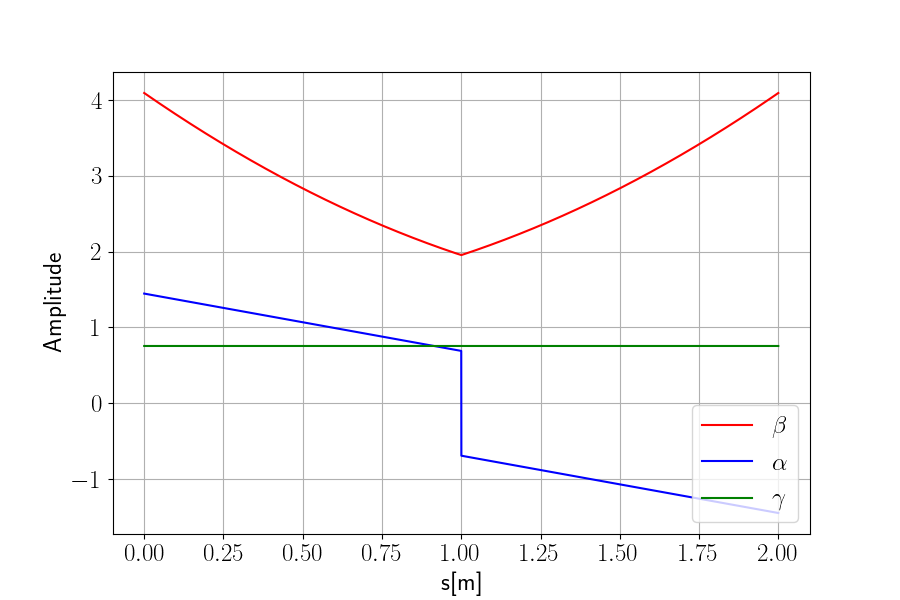

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [32]:

Fig = plt.figure(1)
plt.plot(np.linspace(0,2*L,2*size),beta,'r')
plt.plot(np.linspace(0,2*L,2*size),alpha,'b')
plt.plot(np.linspace(0,2*L,2*size),gamma,'g')
plt.xlabel(r's[m]')
plt.ylabel(r'Amplitude')
plt.legend([r"$\beta$",r"$\alpha$",r"$\gamma$"], loc = 4)
plt.grid()
Fig.savefig("twiss_param_book.eps")


We do get a constant $\gamma$ parameter.